In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
from tqdm.notebook import tqdm

torch.manual_seed(32)

In [2]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

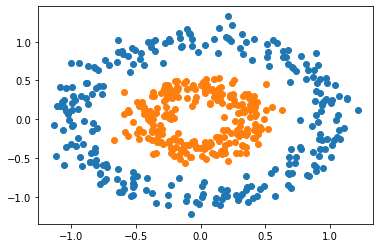

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [5]:
model = Model(2, 6, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.5313, -0.3223],
        [-0.1215,  0.4041],
        [-0.5473,  0.1122],
        [ 0.2094, -0.6747],
        [ 0.1236, -0.2469],
        [ 0.6343,  0.0310]], requires_grad=True), Parameter containing:
tensor([ 0.5348,  0.3188,  0.2729, -0.6705,  0.6109, -0.5780],
       requires_grad=True), Parameter containing:
tensor([[ 0.1777,  0.1854, -0.0027,  0.3517, -0.1080, -0.2410]],
       requires_grad=True), Parameter containing:
tensor([0.1344], requires_grad=True)]


In [6]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [21]:
epochs = 1000
losses = []

progress_bar = tqdm(range(epochs))
for i in progress_bar:
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    progress_bar.set_description(f"epoch: {i} loss: {loss.item()}")

  0%|          | 0/1000 [00:00<?, ?it/s]

Loss over time


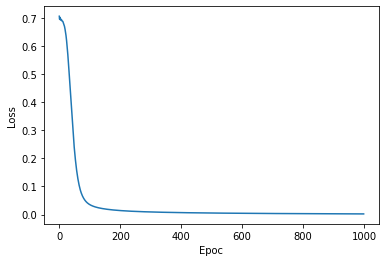

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoc")
print("Loss over time")

In [9]:
def plot_decision_boundry(X, y):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0] + 0.25))
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1] + 0.25))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])

Trained Network


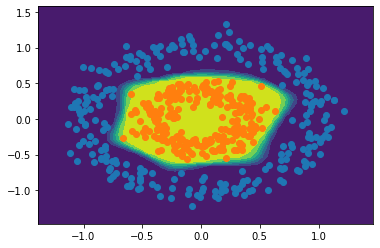

In [13]:
print("Trained Network")
plot_decision_boundry(X, y)

First Prediction, item in center of graph, group 1
1


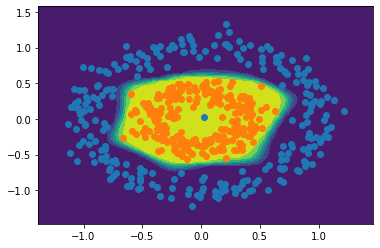

In [14]:
p_x = 0.025
p_y = 0.025
point = torch.Tensor([p_x, p_y])

pred = model.predict(point)
print("First Prediction, item in center of graph, group 1")
print(pred)
plt.plot([p_x], [p_y], "o")
plot_decision_boundry(X, y)

0


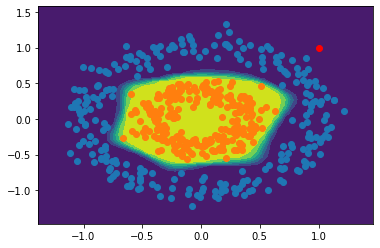

In [12]:
p_x = 1
p_y = 1
point = torch.Tensor([p_x, p_y])
pred = model.predict(point)
print("Second Prediction, item in upper right of graph, group 0")
print(pred)
plot_decision_boundry(X, y)
plt.plot([p_x], [p_y], "ro")